In [4]:
# Implement the naive_with_rc function
# from naive_with_rc import naive_with_rc

comlements = {'A': 'T',
              'C': 'G',
              'T': 'A',
              'G': 'C',
              'N': 'N'}

def get_occurences(p, t):
    occurences = []
    i = 0
    while i < len(t) - len(p) + 1:
        j = 0
        while j < len(p):
            if p[j] != t[j+i]:
                break
            if j == len(p) - 1:
                occurences.append(i)
            j += 1
        i += 1
    return occurences
    
def get_rc(s):
    compl = [comlements[i] for i in s]
    compl.reverse()
    return "".join(compl)
    
def naive_with_rc(p, t):
    p_occurences = get_occurences(p, t)
    rc_p = get_rc(p)
    rc_occurences = get_occurences(rc_p, t) if rc_p != p else []
    return p_occurences + rc_occurences


In [77]:
# # Implement the naive_2mm function
def naive_2mm(p, t):
    occurences = []
    i = 0
    while i < len(t) - len(p) + 1:
        j = 0
        mm = 0
        while j < len(p):
            if p[j] != t[j+i]:
                mm += 1
                if mm == 3:
                    break
            if j == len(p) - 1:
                occurences.append(i)
            j += 1
        i += 1
    return occurences

### Example 1

In [5]:
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 23]


### Example 2

In [6]:
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 24]


### Example 3

In [7]:
# Phi-X genome
!wget http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa

--2018-10-06 14:41:40--  http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa
Resolving d396qusza40orc.cloudfront.net... 52.84.245.3, 52.84.245.121, 52.84.245.110, ...
Connecting to d396qusza40orc.cloudfront.net|52.84.245.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: 'phix.fa.4'

phix.fa.4           100%[===================>]   5.40K  --.-KB/s    in 0s      

2018-10-06 14:41:40 (479 MB/s) - 'phix.fa.4' saved [5528/5528]



In [8]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [9]:
phix_genome = readGenome('phix.fa')

In [10]:
occurrences = naive_with_rc('ATTA', phix_genome)

In [11]:
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 62


In [12]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 60


In [13]:
lambda_genome = readGenome('lambda_virus.fa')

How many times does AGGT or its reverse complement (ACCT) occur in the lambda virus genome?

In [14]:
print(len(naive_with_rc('AGGT', lambda_genome)))

306


In [15]:
print(len(naive_with_rc('TTAA', lambda_genome)))

195


In [16]:
print(lambda_genome.find('ACTAAGT'))
print(lambda_genome.find(get_rc('ACTAAGT')))

27733
26028


In [17]:
print(lambda_genome.find('AGTCGA'))
print(lambda_genome.find(get_rc('AGTCGA')))

18005
450


In [74]:
print(len(naive_2mm('TTCAAGCC', lambda_genome)))

191


In [78]:
print((naive_2mm('AGGAGGTT', lambda_genome))[0])
print(lambda_genome[45:58])

49
TTTAAGGCGTTTC


In [21]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2018-10-06 14:57:55--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net... 52.84.245.118, 52.84.245.154, 52.84.245.39, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net|52.84.245.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: 'ERR037900_1.first1000.fastq'

ERR037900_1.first10 100%[===================>] 235.96K  1.22MB/s    in 0.2s    

2018-10-06 14:57:56 (1.22 MB/s) - 'ERR037900_1.first1000.fastq' saved [241626/241626]



In [22]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [26]:
_, qualities = readFastq('ERR037900_1.first1000.fastq')

In [57]:
def phred33_2_quality(quality):
    return ord(quality) - 33

def quality_sums(qualities):
    if not qualities:
        return -1

    quals_sums = len(qualities[0]) * [0]

    for qual in qualities:
        for index, base in enumerate(qual):
            score = phred33_2_quality(base)
            quals_sums[index] += score
    
    return quals_sums
            
            

In [58]:
import matplotlib.pyplot as plt

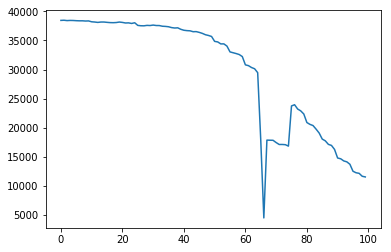

In [59]:
plt.plot(quality_sums(qualities))
plt.show()

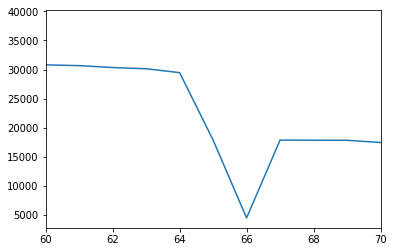

In [60]:
plt.plot(lowest_quality_offset(qualities))
plt.xlim(60, 70)
plt.show()

In [65]:
print(quality_sums(qualities)[64:68])

[29463, 17891, 4526, 17881]
